## Scikit-learn Installation through pip

- **Create Virtual Environment**
<br>python -m venv sklearn-env </br>
- **Activate Virtual Environment**
<br>sklearn-env\Scripts\activate  # activate</br>
- **Install Scikit-learn**
<br> pip install -U scikit-learn </br>

In order to check your installation, you can use:

<br>python -m pip show scikit-learn  # show scikit-learn version and location </br>
<br>python -m pip freeze             # show all installed packages in the environment</br>
<br>python -c "import sklearn; sklearn.show_versions()"</br>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn import linear_model

homeprices_df = pd.read_csv(filepath_or_buffer="homeprices.csv")
homeprices_df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


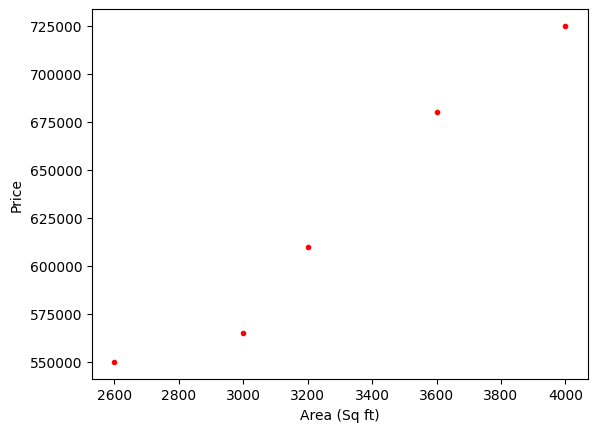

In [3]:
%matplotlib inline
plt.xlabel("Area (Sq ft)")
plt.ylabel("Price")
plt.scatter(homeprices_df['area'],homeprices_df['price'],color='red',marker='.')

In [4]:
reg = linear_model.LinearRegression()
reg.fit(homeprices_df[['area']],homeprices_df['price'])

LinearRegression()

In [28]:
reg.predict(homeprices_df[['area']])

array([533664.38356164, 587979.45205479, 615136.98630137, 669452.05479452,
       723767.12328767])

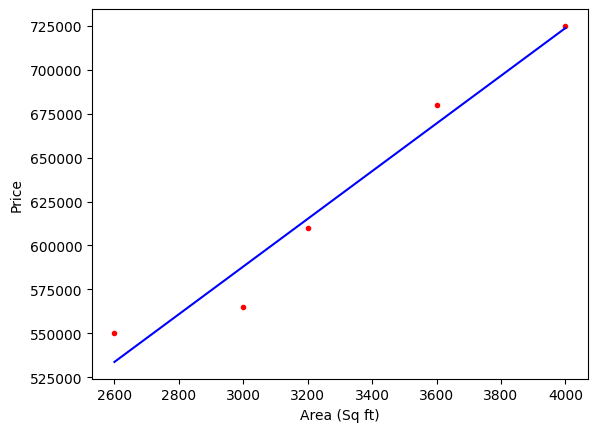

In [29]:
%matplotlib inline
plt.xlabel("Area (Sq ft)")
plt.ylabel("Price")
plt.scatter(homeprices_df['area'],homeprices_df['price'],color='red',marker='.')
plt.plot(homeprices_df['area'],reg.predict(homeprices_df[['area']]), color = 'blue')

In [14]:
reg.coef_

array([135.78767123])

In [21]:
reg.intercept_

np.float64(180616.43835616432)

In [22]:
reg.predict([[5000]])

e:\DS_InSaid_Material\ML_Foundation\Git_ML_Practice\ML_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

In [23]:
reg.predict([[3000]])

e:\DS_InSaid_Material\ML_Foundation\Git_ML_Practice\ML_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([587979.45205479])

## Create Output file for Model

In [25]:
import pickle

with open('house_prices_model','wb') as f:
     pickle.dump(reg,f)

In [26]:
# reading a file 
with open('house_prices_model','rb') as f:
 model =   pickle.load(f)
    

In [27]:
model.predict([[6000]])

e:\DS_InSaid_Material\ML_Foundation\Git_ML_Practice\ML_env\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([995342.46575342])

In [15]:
# # Example of predicting a single value using a new data point
# scaler = StandardScaler()
# new_data = np.array([[3300, 5000]])  # Example values for Feature1 and Feature2
# new_data_scaled = scaler.fit_transform(new_data)  # Scale the new data
# single_prediction = reg.predict(new_data_scaled)
# single_prediction


In [16]:
areas_df= pd.read_csv("areas.csv")
areas_df.head(5)

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [17]:
areas_df.describe()

,area
count,13.000000
mean,4440.000000
std,2547.825871
min,1000.000000
25%,2300.000000
50%,4120.000000
75%,5490.000000
max,9000.000000


In [18]:
predicted_values= reg.predict(areas_df)
predicted_values

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [19]:
areas_df['prices'] = predicted_values

In [20]:
areas_df.to_csv("predictions.csv", index=False)